# Detection of Fake Tweets about Disasters using NLP Text Classification


### Detection of Fake Tweets about Disasters using NLP text classification
The dataset used is the Kaggle dataset
https://www.kaggle.com/c/nlp-getting-started/data
About the data:
- The basic objective task of the dataset has always been to create an algorithm that can determine if a Twitter tweet is real disasters or not . 
- The uploaded dataset is divided into two CSV files, ‘train.csv’ and ‘test.csv’. Combined there are a total of 10876 records. 
- There are only five columns in the dataset: id , text, location, keyword, target . Target column is not present in test dataset 
- There are no missing dataset in Text column 
- Datset is imbalanced with more fake tweets.
-  Except the text column other columns dont give information to train the model .

Approach :
-As the Test datset doesnt have target column, Train data has been used to train the model .
-The trained model has been used to predict Test datset target value 
- Then the train and Test datset have been combined to train the model 



In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
test_data = pd.read_csv('data/test.csv')
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
from pandas_profiling import ProfileReport
ProfileReport(train_data)
#prof = ProfileReport(news_data)
#prof.to_file(output_file='newsdata.html')

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


In [10]:
train_data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [11]:
train_data['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [12]:
train_data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [13]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [14]:
test_data.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

[Text(0, 0, '4342'), Text(0, 0, '3271')]

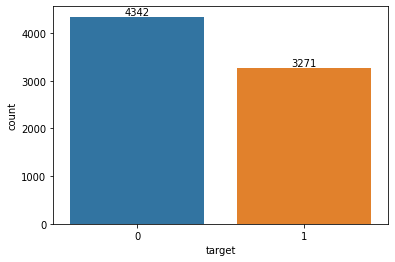

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(x=train_data['target'],
                   order=train_data['target'].value_counts(ascending=False).index)
abs_values = train_data['target'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)


In [16]:
train_data["text"].map(str)

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [17]:
y_train = train_data["target"]
X_train = train_data["text"]


In [18]:
X_test= test_data["text"]

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(train_data["text"], y, test_size=0.2)
#print(len(X_train),len(X_test), len(y_train), len(y_test)) 

In [20]:
embed_dim = 50
lstm_out = 64
batch_size = 32

max_words = 2000
max_len = 400

In [21]:
token = Tokenizer(num_words=max_words, lower=True, split=' ')
token.fit_on_texts(X_train.values)
sequences = token.texts_to_sequences(X_train.values)
train_sequences_padded = pad_sequences(sequences, maxlen=max_len)

In [22]:
model = Sequential()
model.add(Embedding(max_words, embed_dim, input_length = max_len))
model.add(LSTM(lstm_out))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, name='out_layer'))
model.add(Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-01-27 09:57:04.071517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-27 09:57:04.072284: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 50)           100000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257       
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [23]:
history = model.fit(train_sequences_padded, y_train, batch_size=batch_size, epochs = 5, validation_split=0.2)

Epoch 1/5


2022-01-27 09:57:04.433127: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-27 09:57:04.867676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 09:57:05.059518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 09:57:06.254033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


191/191 [==============================] - ETA: 0s - loss: 0.6507 - accuracy: 0.6256

2022-01-27 09:57:37.486790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 09:57:37.561996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


191/191 [==============================] - 37s 174ms/step - loss: 0.6507 - accuracy: 0.6256 - val_loss: 0.6438 - val_accuracy: 0.6225
Epoch 2/5
191/191 [==============================] - 28s 144ms/step - loss: 0.6102 - accuracy: 0.6711 - val_loss: 0.5861 - val_accuracy: 0.7026
Epoch 3/5
191/191 [==============================] - 30s 158ms/step - loss: 0.5486 - accuracy: 0.7351 - val_loss: 0.5639 - val_accuracy: 0.7150
Epoch 4/5
191/191 [==============================] - 28s 149ms/step - loss: 0.5066 - accuracy: 0.7654 - val_loss: 0.5540 - val_accuracy: 0.7321
Epoch 5/5
191/191 [==============================] - 29s 150ms/step - loss: 0.4812 - accuracy: 0.7842 - val_loss: 0.5172 - val_accuracy: 0.7439


([<matplotlib.axis.XTick at 0x2b79c9ca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

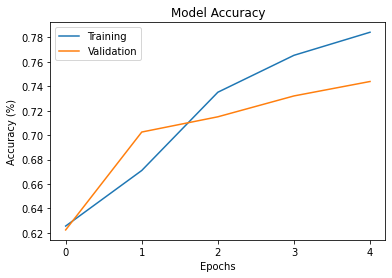

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Training', 'Validation'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])


([<matplotlib.axis.XTick at 0x28c5b1b50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

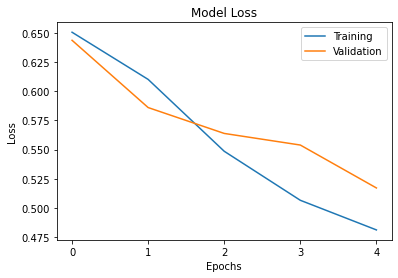

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Training', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

In [26]:
#Comparing with test Data
test_sequences = token.texts_to_sequences(X_test)
test_sequences_padded = pad_sequences(test_sequences, maxlen=max_len)


In [27]:
y_pred = model.predict(test_sequences_padded)


2022-01-27 09:59:38.066873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 09:59:38.140637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [28]:
y_pred

array([[0.39299256],
       [0.64873713],
       [0.52878904],
       ...,
       [0.9176848 ],
       [0.8817865 ],
       [0.3813311 ]], dtype=float32)

In [29]:
import numpy as np
y_pred = np.array(y_pred)
y_pred[y_pred>=0.6]=1
y_pred[y_pred<0.6]=0
y_pred
#y_test = [int(y_pred>=.6) for p in y_pred]

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [30]:
y_test = y_pred

In [31]:
test_data["target"] = y_test.astype(int)
test_data['target']

0       0
1       1
2       0
3       0
4       1
       ..
3258    1
3259    1
3260    1
3261    1
3262    0
Name: target, Length: 3263, dtype: int64

In [33]:
model.evaluate(test_sequences_padded, y_test)
#model evaluation using calculates Test data targe column

2022-01-27 09:59:58.274352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 09:59:58.485538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


102/102 [==============================] - 8s 57ms/step - loss: 0.3222 - accuracy: 0.9323


[0.3221505880355835, 0.9322709441184998]

Combining the Test and Train dataset to train the model 

In [34]:
news_data = pd.concat([train_data,test_data]).reset_index(drop = True)
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10876 non-null  int64 
 1   keyword   10789 non-null  object
 2   location  7238 non-null   object
 3   text      10876 non-null  object
 4   target    10876 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 425.0+ KB


In [ ]:
news_data.target.value_counts()

0    6626
1    4250
Name: target, dtype: int64

In [ ]:
news_data.isnull().sum()

id             0
keyword       87
location    3638
text           0
target         0
dtype: int64

In [ ]:
y1 = news_data["target"]
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(news_data["text"], y1, test_size=0.2)
print(len(X_train1),len(X_test1), len(y_train1), len(y_test1)) 

8700 2176 8700 2176


In [ ]:
token1 = Tokenizer(num_words=max_words, lower=True, split=' ')
token1.fit_on_texts(X_train1.values)
sequences1 = token.texts_to_sequences(X_train1.values)
train_sequences_padded1 = pad_sequences(sequences, maxlen=max_len)

In [ ]:
model1 = Sequential()
model1.add(Embedding(max_words, embed_dim, input_length = max_len))
model1.add(LSTM(lstm_out))
model1.add(Dense(256))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, name='out_layer'))
model1.add(Activation('sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model1.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 400, 50)           100000    
                                                                 
 lstm_7 (LSTM)               (None, 64)                29440     
                                                                 
 dense_7 (Dense)             (None, 256)               16640     
                                                                 
 activation_14 (Activation)  (None, 256)               0         
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257       
                                                                 
 activation_15 (Activation)  (None, 1)                

In [ ]:
history1 = model1.fit(train_sequences_padded1, y_train1, batch_size=batch_size, epochs = 5, validation_split=0.2)

Epoch 1/5


2022-01-26 21:21:02.372680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 21:21:02.720519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 21:21:03.905244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


191/191 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.6110

2022-01-26 21:21:49.277142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 21:21:49.404170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


191/191 [==============================] - 53s 258ms/step - loss: 0.6715 - accuracy: 0.6110 - val_loss: 0.6672 - val_accuracy: 0.6133
Epoch 2/5
191/191 [==============================] - 36s 188ms/step - loss: 0.6680 - accuracy: 0.6113 - val_loss: 0.6671 - val_accuracy: 0.6133
Epoch 3/5
191/191 [==============================] - 39s 202ms/step - loss: 0.6679 - accuracy: 0.6113 - val_loss: 0.6675 - val_accuracy: 0.6133
Epoch 4/5
191/191 [==============================] - 45s 238ms/step - loss: 0.6655 - accuracy: 0.6112 - val_loss: 0.6695 - val_accuracy: 0.6159
Epoch 5/5
191/191 [==============================] - 36s 190ms/step - loss: 0.6631 - accuracy: 0.6140 - val_loss: 0.6739 - val_accuracy: 0.6014


In [ ]:
test_sequences1 = token.texts_to_sequences(X_test1)
test_sequences_padded1 = pad_sequences(test_sequences1, maxlen=max_len)

In [ ]:
model.evaluate(test_sequences_padded1, y_test1)

2022-01-26 21:24:32.945411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 21:24:33.065194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 5s 45ms/step - loss: 0.4090 - accuracy: 0.8359


[0.40901145339012146, 0.8359375]

([<matplotlib.axis.XTick at 0x2d967ff40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

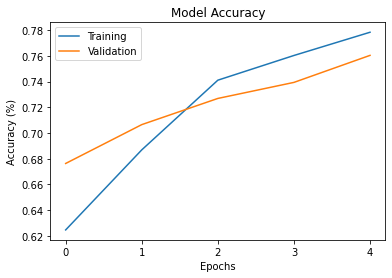

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Training', 'Validation'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

([<matplotlib.axis.XTick at 0x2da0793d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

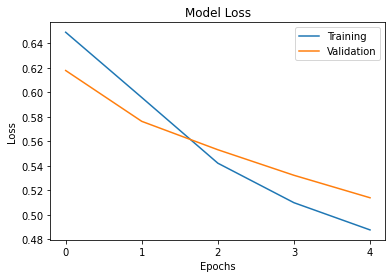

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Training', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])